# Data Scientist Challenge - LATAM Airlines
## Contexto

En este notebook se desarrolla el desafío de selección de Latam Airlines, el cual consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso se analizara un dataset basado en datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. 
Para cada vuelo se cuenta con la siguiente información:

- Fecha-I : Fecha y hora programada del vuelo.
- Vlo-I : Número de vuelo programado.
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Emp-I : Código aerolínea de vuelo programado.
- Fecha-O : Fecha y hora de operación del vuelo.
- Vlo-O : Número de vuelo de operación del vuelo.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- Emp-O : Código aerolínea de vuelo operado.
- DIA : Día del mes de operación del vuelo.
- MES : Número de mes de operación del vuelo.
- AÑO : Año de operación del vuelo.
- DIANOM : Día de la semana de operación del vuelo.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA : Nombre de aerolínea que opera.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino

Basado en este dataset se plantea un desafío que se describe a continuación:

## Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
- temporada_alta : 
    - 1 si Fecha-I está entre [15-Dic , 3-Mar], [15-Jul , 31-Jul], [11-Sep, 30-Sep], 
    - 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
- atraso_15 : 
    - 1 si dif_min > 15 
    - 0 si no.
- periodo_dia (en base a Fecha-I): 
    - mañana (entre 5:00 y 11:59) 
    - tarde (entre 12:00 y 18:59)
    - noche (entre 19:00 y 4:59)
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?
Aspectos a considerar
Orden y claridad al momento de plantear un análisis, idea, código, etc.
Creatividad para resolver el desafío.
Código versionado en Git.
No vamos a revisar excel, macros, códigos en R.
No vamos a revisar desafíos que no lleguen en la fecha indicada
Ante cualquier duda, deja explícitos tus supestos
No vivimos en tu cabeza, trata de expresarte lo mejor posible para explicar tus decisiones y respuestas

## Plan de trabajo

1. Se revisaran los datos de entrada, en particular se limpiaran y ajustaran los tipos de datos de entrada si es que aplica.
2. Se realizará un análisis descriptivo de los datos para entender que contiene el dataset.
3. Se desarrollarán los puntos del desafío.
4. Se genera una analisis final y conclusión.

## Primera Parte: Análisis Base y limpieza de datos
Para el análisis de los datos se utilizará la librería pandas

In [3]:
import pandas as pd

Luego cargamos los datos de entrada, que se encuentran en la carpeta **../00/entradas**

In [4]:
df = pd.read_csv("../00_entradas/dataset_SCL.csv")
df

C:\Users\maste\AppData\Local\Temp\ipykernel_16844\2709452898.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../00_entradas/dataset_SCL.csv")


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Se observa que el dataset contiene la información de 68206 vuelos. Si los datos están ordenados, los vuelos corresponden a los programados durante el año 2017, lo corroboraremos más tarde.
Además se observa que tanto las columnas Vlo-I y Vlo-O, tienen tipos mixtos a los que hay que observar. Analicemos los tipo de datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Se observa que en el dataset,solo existe un nulo en la característica Vlo-O, analicemos ese caso

In [6]:
df.isna().sum()['Vlo-O']

1

In [7]:
df[df["Vlo-O"].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


El vuelo corresponde a un vuelo internacional Santiago-Lima, programado por Latn American Wings, que finalmente fue operado por 56R. cuyo numero de vuelo se perdió. A continucaión se muestra los vuelos operados por 56R.

In [8]:
df[df['Emp-O']=="56R"]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6067,2017-01-18 11:00:00,200,SCEL,SPJC,LAW,2017-01-18 11:06:00,200,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6079,2017-01-04 01:15:00,700,SCEL,SPJC,LAW,2017-01-04 02:25:00,700,SCEL,SPJC,56R,4,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6080,2017-01-06 01:15:00,700,SCEL,SPJC,LAW,2017-01-06 02:18:00,700,SCEL,SPJC,56R,6,1,2017,Viernes,I,Latin American Wings,Santiago,Lima
6082,2017-01-08 01:15:00,700,SCEL,SPJC,LAW,2017-01-08 02:01:00,700,SCEL,SPJC,56R,8,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6083,2017-01-11 01:15:00,700,SCEL,SPJC,LAW,2017-01-11 01:20:00,700,SCEL,SPJC,56R,11,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6084,2017-01-13 01:15:00,700,SCEL,SPJC,LAW,2017-01-13 02:48:00,700,SCEL,SPJC,56R,13,1,2017,Viernes,I,Latin American Wings,Santiago,Lima
6086,2017-01-18 01:15:00,700,SCEL,SPJC,LAW,2017-01-18 01:36:00,702,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6094,2017-01-02 01:15:00,704,SCEL,SPJC,LAW,2017-01-02 01:34:00,704,SCEL,SPJC,56R,2,1,2017,Lunes,I,Latin American Wings,Santiago,Lima
6095,2017-01-05 01:15:00,704,SCEL,SPJC,LAW,2017-01-05 01:15:00,708,SCEL,SPJC,56R,5,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Todos los vuelos operados opr 56R, fueron en enero de 2017

Volvamos a los tipos de datos, intentaremos que se infieran automaticamente.

In [9]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  string
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  string
 3   Des-I      68206 non-null  string
 4   Emp-I      68206 non-null  string
 5   Fecha-O    68206 non-null  string
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  string
 8   Des-O      68206 non-null  string
 9   Emp-O      68206 non-null  string
 10  DIA        68206 non-null  Int64 
 11  MES        68206 non-null  Int64 
 12  AÑO        68206 non-null  Int64 
 13  DIANOM     68206 non-null  string
 14  TIPOVUELO  68206 non-null  string
 15  OPERA      68206 non-null  string
 16  SIGLAORI   68206 non-null  string
 17  SIGLADES   68206 non-null  string
dtypes: Int64(3), object(2), string(13)
memory usage: 9.6+ MB


Notemos que la mayoria de los tipos se formateó de manera correcta, pero se observa que las fechas y los Vuelos de origen y destino no quedaron bien formateados. Aplicamos formatos a esos tipos de datos. Y el valor nulo simplemente lo convertiremos en UNK


In [10]:
df = df.astype({
            'Vlo-I': 'string',
            'Vlo-O': 'string', 
            'Fecha-I' : 'datetime64',
            'Fecha-O' : 'datetime64'
            })
# AgreGAMOS el valor UNK siempre y cuando no exista otro
if (df[df['Vlo-O']=='UNK']).size == 0:
    df.fillna('UNK', inplace=True)
df.info()

def convert_types(df):
    df_tmp = df.convert_dtypes()
    df_tmp = df_tmp.astype({
            'Vlo-I': 'string',
            'Vlo-O': 'string', 
            'Fecha-I' : 'datetime64',
            'Fecha-O' : 'datetime64'
            })
    if (df_tmp[df_tmp['Vlo-O']=='UNK']).size == 0:
        df_tmp.fillna('UNK', inplace=True)
    return df_tmp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  string        
 2   Ori-I      68206 non-null  string        
 3   Des-I      68206 non-null  string        
 4   Emp-I      68206 non-null  string        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  string        
 7   Ori-O      68206 non-null  string        
 8   Des-O      68206 non-null  string        
 9   Emp-O      68206 non-null  string        
 10  DIA        68206 non-null  Int64         
 11  MES        68206 non-null  Int64         
 12  AÑO        68206 non-null  Int64         
 13  DIANOM     68206 non-null  string        
 14  TIPOVUELO  68206 non-null  string        
 15  OPERA      68206 non-null  string        
 16  SIGLAORI   68206 non-null  string       

Con lo anterior, los tipos de datos quedaron bien.
Ahora veamos una descripción simple de los datos


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [16]:
df.describe(datetime_is_numeric=True)

,Fecha-I,Fecha-O,DIA,MES,AÑO
count,68206,68206,68206.000000,68206.000000,68206.000000
mean,2017-07-05 12:11:25.320059648,2017-07-05 12:20:31.971380992,15.714790,6.622585,2017.000029
min,2017-01-01 00:15:00,2017-01-01 00:04:00,1.000000,1.000000,2017.000000
25%,2017-03-31 12:41:15,2017-03-31 12:51:15,8.000000,3.000000,2017.000000
50%,2017-07-10 05:30:00,2017-07-10 05:37:00,16.000000,7.000000,2017.000000
75%,2017-10-08 11:18:45,2017-10-08 11:19:45,23.000000,10.000000,2017.000000
max,2017-12-31 23:55:00,2018-01-01 00:12:00,31.000000,12.000000,2018.000000
std,NaN,NaN,8.782886,3.523321,0.005415


Se observa que el dataset incluye los vuelos que se programaron en 2017. Es por esto que la últime fecha de Fecha-O corresponde a 2018-01-01 00:12:00, que corresponde a la operacion de un vuelo programado en 2017.
Veamos como se comportan en el tiempo los vuelos:

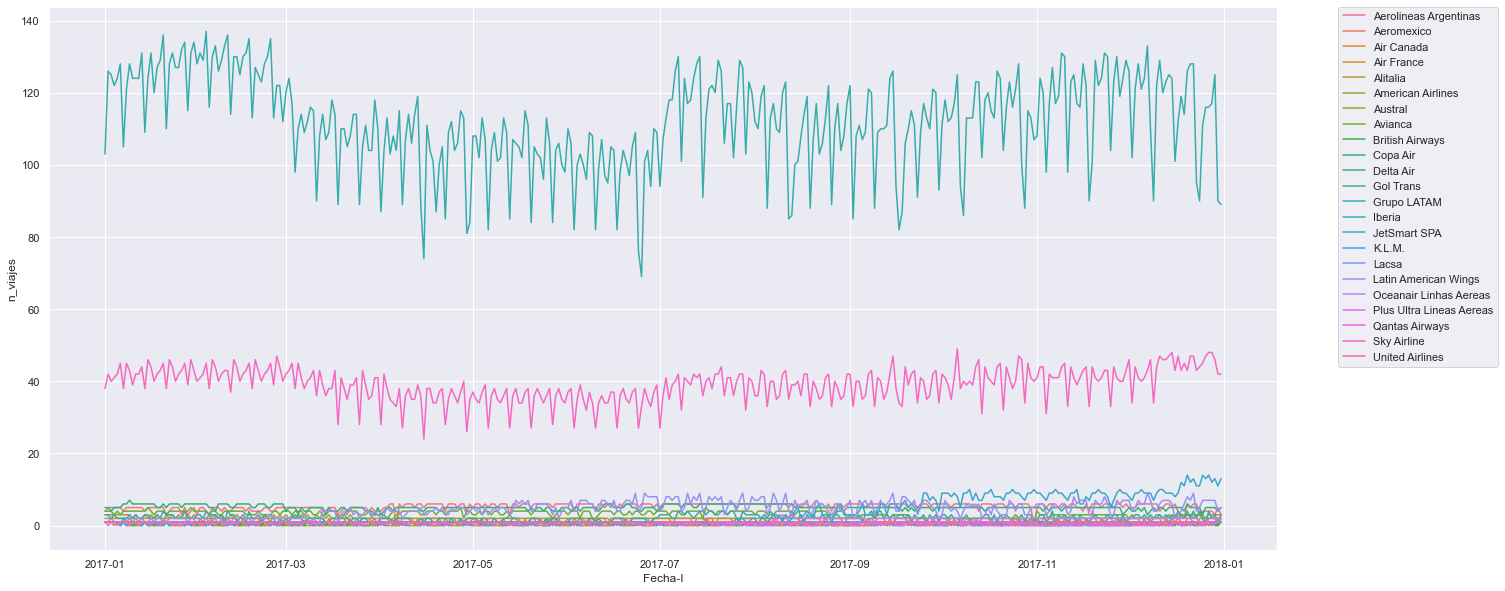

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.set_index('Fecha-I')
df_viajes_dia_aerolinea = df2.groupby(by='OPERA').resample('d').count()[['Des-O']].rename(columns={'Des-O':'n_viajes'}).reset_index()
sns.set(rc={"figure.figsize":(22, 10)})
sns.lineplot(data=df_viajes_dia_aerolinea, x='Fecha-I', y="n_viajes", hue="OPERA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Se observa que la mayor cantidad de vuelos son operados por Grupo LATAM seguido por Sky AIrline, y en el ultimo periodo del año se observa un crecimiento sostenido de vuelos a partir del segundo semestre de 2017 de la aerolinea "JetSmart SPA".



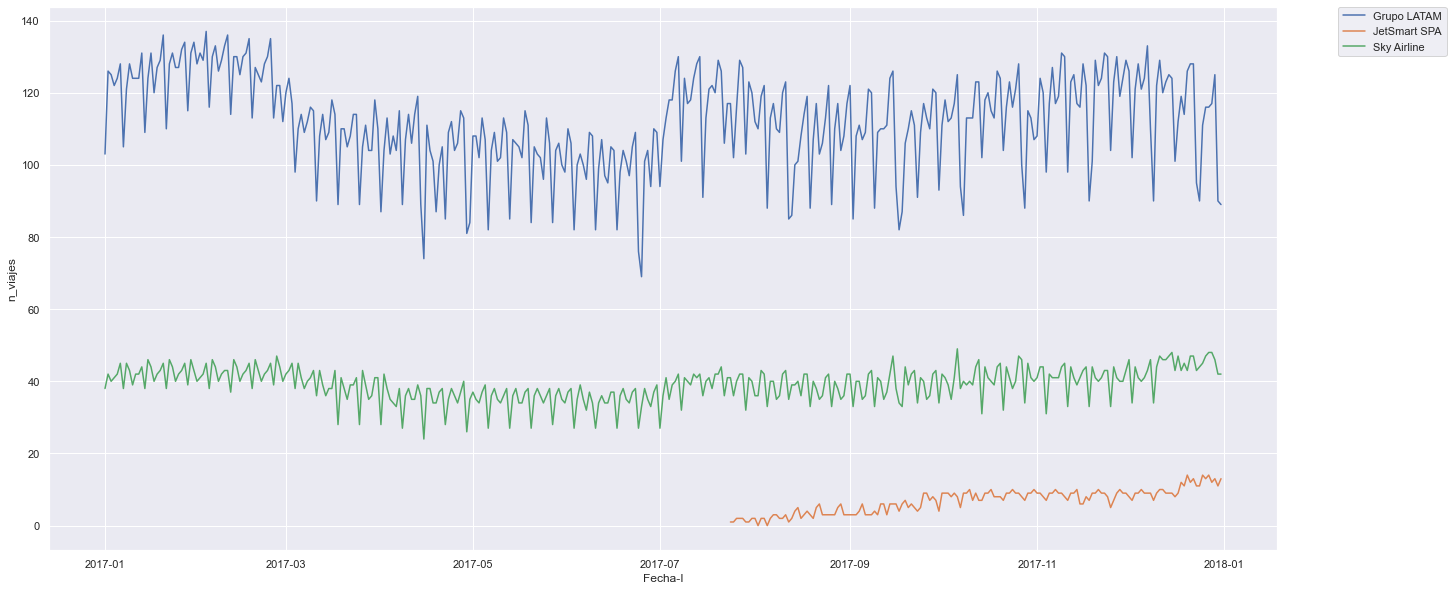

In [19]:
sns.lineplot(data=df_viajes_dia_aerolinea[df_viajes_dia_aerolinea["OPERA"].isin(["Grupo LATAM","Sky Airline", "JetSmart SPA"])], x='Fecha-I', y="n_viajes", hue="OPERA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Luego las demás aerolineas tienen un comportamiento que no supera los 8 vuelos diarios, como se ve en el siguiente gráfico.

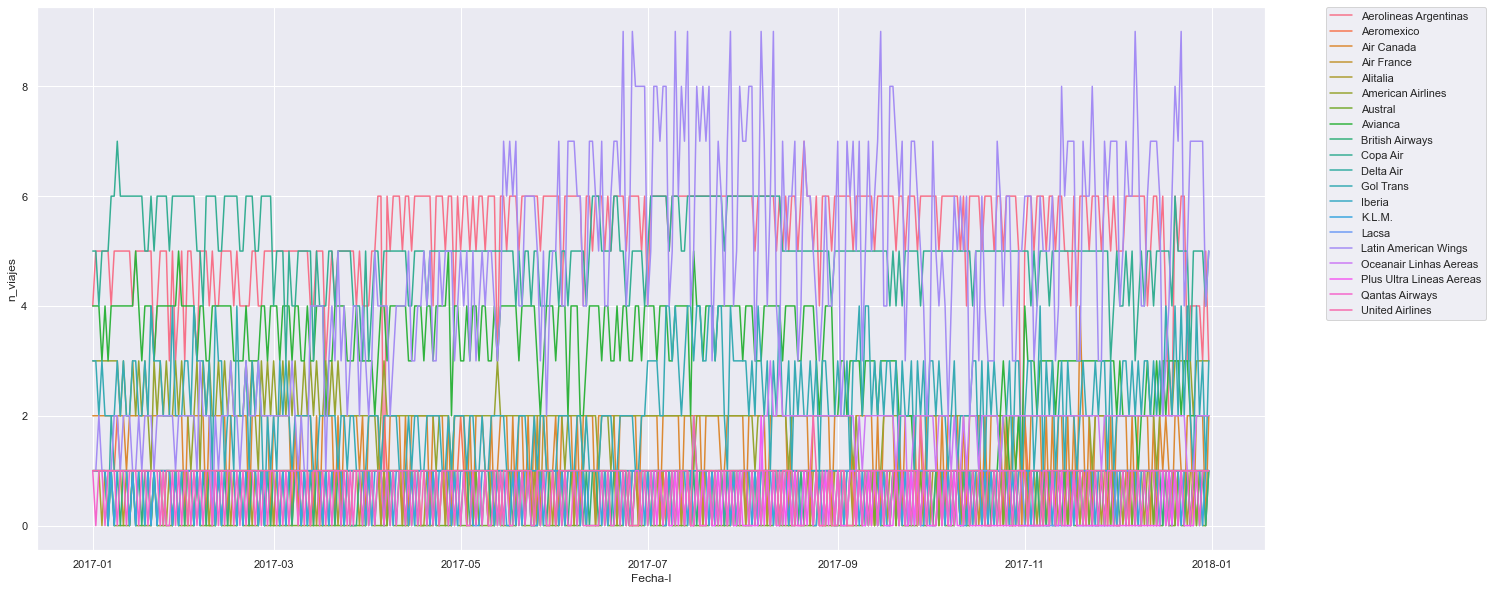

In [20]:
sns.lineplot(data=df_viajes_dia_aerolinea[~df_viajes_dia_aerolinea["OPERA"].isin(["Grupo LATAM","Sky Airline", "JetSmart SPA"])], x='Fecha-I', y="n_viajes", hue="OPERA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Analicemos independiente del tiempo como se estructuran los datos

In [21]:
df2=df.set_index('Fecha-I')
#df2 = df2.replace("\.0","",regex=True).loc[df2['Vlo-O'].str.contains("\.0", case=False)]
#df2.resample('d').sum()
df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count()

Fecha-O  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES                  
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales       37   
                        1.0   SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales        9   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt        361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama               25   
                        10.0  SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama               14   
...                                                                                                 ...   
99    SCEL  SCCI  LAN   99.0  SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas          4   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas          9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas          3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo             1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima                  1   

                                                                                                DIA  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES              
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales   37   
                        1.0   SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales    9   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt    361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           25   
                        10.0  SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           14   
...                                                                                             ...   
99    SCEL  SCCI  LAN   99.0  SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      4   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo         1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima              1   

                                                                                                MES  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES              
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales   37   
                        1.0   SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales    9   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt    361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           25   
                        10.0  SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           14   
...                                                                                             ...   
99    SCEL  SCCI  LAN   99.0  SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      4   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo         1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima              1   

                        

De la agrupación de los datos se observa que Vlo-O en algunos casos termina con un nuemro decimal. Eliminaremos todos los caracteres sobrantes


In [22]:
df['Vlo-O'] = df['Vlo-O'].apply(lambda x: x[:-2] if "." in x else x) 

In [23]:
df2=df.set_index('Fecha-I')
#df2 = df2.replace("\.0","",regex=True).loc[df2['Vlo-O'].str.contains("\.0", case=False)]
#df2.resample('d').sum()
display(df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count())
df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count().sum()

Fecha-O  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES                  
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales       46   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt        361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama               39   
100   SCEL  SCSE  SKU   100   SCEL  SCSE  SKU   N         Sky Airline  Santiago La Serena            20   
1003  SCEL  SAEZ  LAN   1003  SCEL  SAEZ  LAN   I         Grupo LATAM  Santiago Buenos Aires          3   
...                                                                                                 ...   
99    SCEL  SCCI  LAN   99    SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas         17   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas          9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas          3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo             1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima                  1   

                                                                                                DIA  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES              
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales   46   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt    361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           39   
100   SCEL  SCSE  SKU   100   SCEL  SCSE  SKU   N         Sky Airline  Santiago La Serena        20   
1003  SCEL  SAEZ  LAN   1003  SCEL  SAEZ  LAN   I         Grupo LATAM  Santiago Buenos Aires      3   
...                                                                                             ...   
99    SCEL  SCCI  LAN   99    SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas     17   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo         1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima              1   

                                                                                                MES  \
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES              
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales   46   
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt    361   
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama           39   
100   SCEL  SCSE  SKU   100   SCEL  SCSE  SKU   N         Sky Airline  Santiago La Serena        20   
1003  SCEL  SAEZ  LAN   1003  SCEL  SAEZ  LAN   I         Grupo LATAM  Santiago Buenos Aires      3   
...                                                                                             ...   
99    SCEL  SCCI  LAN   99    SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas     17   
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      9   
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas      3   
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo         1   
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima              1   

                        

Fecha-O    68206
DIA        68206
MES        68206
AÑO        68206
DIANOM     68206
dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68206 entries, 2017-01-01 23:30:00 to 2017-12-31 14:55:00
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Vlo-I      68206 non-null  string        
 1   Ori-I      68206 non-null  string        
 2   Des-I      68206 non-null  string        
 3   Emp-I      68206 non-null  string        
 4   Fecha-O    68206 non-null  datetime64[ns]
 5   Vlo-O      68206 non-null  object        
 6   Ori-O      68206 non-null  string        
 7   Des-O      68206 non-null  string        
 8   Emp-O      68206 non-null  string        
 9   DIA        68206 non-null  Int64         
 10  MES        68206 non-null  Int64         
 11  AÑO        68206 non-null  Int64         
 12  DIANOM     68206 non-null  string        
 13  TIPOVUELO  68206 non-null  string        
 14  OPERA      68206 non-null  string        
 15  SIGLAORI   68206 non-null  string        
 16  SIGLA

In [25]:
df2=df.set_index('Fecha-I')
#df2 = df.replace("\.0","",regex=True).loc[df['Vlo-O'].str.contains("\.0", case=False)]
print(df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count().shape) 
df2[df2['Vlo-O'].str.contains("\.0", case=False)]
casos_diferentes = df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count() 
#casos_diferentes = df2.groupby(by=['Vlo-I','Ori-I','Des-I','Emp-I','Vlo-O','Ori-O','Des-O','Emp-O', 'TIPOVUELO','OPERA', 'SIGLAORI', 'SIGLADES']).count()
casos_diferentes=casos_diferentes[["Fecha-O"]].rename(columns={"Fecha-O":"Frecuencia"})

# AgreGAMOS el valor UNK siempre y cuando no exista otro
#casos_diferentes = convert_types(casos_diferentes)
#casos_diferentes.info()



(853, 5)


In [26]:
casos_diferentes['Frecuencia'].sum()

68206

In [27]:
casos_diferentes

Frecuencia
Vlo-I Ori-I Des-I Emp-I Vlo-O Ori-O Des-O Emp-O TIPOVUELO OPERA        SIGLAORI SIGLADES                  
1     SCEL  SCNT  LAN   1     SCEL  SCNT  LAN   N         Grupo LATAM  Santiago Puerto Natales          46
            SCTE  SKU   1     SCEL  SCTE  SKU   N         Sky Airline  Santiago Puerto Montt           361
10    SCEL  SCCF  JAT   10    SCEL  SCCF  JAT   N         JetSmart SPA Santiago Calama                  39
100   SCEL  SCSE  SKU   100   SCEL  SCSE  SKU   N         Sky Airline  Santiago La Serena               20
1003  SCEL  SAEZ  LAN   1003  SCEL  SAEZ  LAN   I         Grupo LATAM  Santiago Buenos Aires             3
...                                                                                                    ...
99    SCEL  SCCI  LAN   99    SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas            17
991   SCEL  SCCI  LAN   991   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas             9
993   SCEL  SCCI  LAN   993   SCEL  SCCI  LAN   N         Grupo LATAM  Santiago Punta Arenas             3
9955  SCEL  SBGR  TAM   9955  SCEL  SBGR  TAM   I         Grupo LATAM  Santiago Sao Paulo                1
9956  SCEL  SPJC  TAM   9956  SCEL  SPJC  TAM   I         Grupo LATAM  Santiago Lima                     1

[853 rows x 1 columns]

La agrupación anterior es interesante, puesto que indica que tenemos 853 casos diferentes que se repiten a lo largo de las fechas del año, para generar la suma de 68206 casos.
Ahora queremos tener una nocion de los distintos valores categoricos existentes en nuestras columnas


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def get_dtype(df,colname):
    return df.dtypes[colname] 


def show_bar_plots_from_categories(df):
    for col in df.columns:
        col_type = get_dtype(df, col)
        #print(str(col_type))
        if str(col_type) == "string":
            print(f"Existen {len(df[col].value_counts())} categorías diferentes en [{col}]: ")
            plt.figure(figsize=(10+0.5*len(df[col].value_counts()),5))
            ax = df[col].value_counts().sort_values(ascending=False).plot.bar(rot=90, grid=True)
            y = df[col].value_counts().sort_values(ascending=False)
            plt.xlabel(col)
            plt.ylabel("Frecuencia")
            plt.title(f"Frecuencia por categoria de columna {col}")
            for p in ax.patches:
                ax.annotate(int(np.round(p.get_height(),decimals=0)),
                            (
                                p.get_x()+p.get_width()/2.,
                                p.get_height()),
                                ha='center',
                                va='center',
                                xytext=(0, 5),
                                textcoords='offset points'
                           )
            plt.show()
 

In [29]:
casos_diferentes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 853 entries, ('1', 'SCEL', 'SCNT', 'LAN', '1', 'SCEL', 'SCNT', 'LAN', 'N', 'Grupo LATAM', 'Santiago', 'Puerto Natales') to ('9956', 'SCEL', 'SPJC', 'TAM', '9956', 'SCEL', 'SPJC', 'TAM', 'I', 'Grupo LATAM', 'Santiago', 'Lima')
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Frecuencia  853 non-null    int64
dtypes: int64(1)
memory usage: 30.5+ KB


Existen 584 categorías diferentes en [Vlo-I]: 


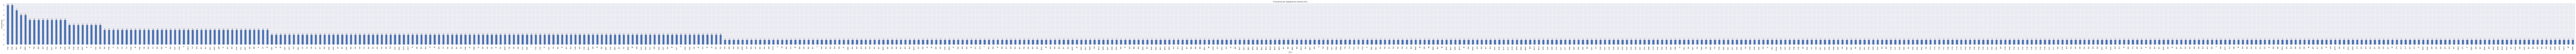

Existen 1 categorías diferentes en [Ori-I]: 


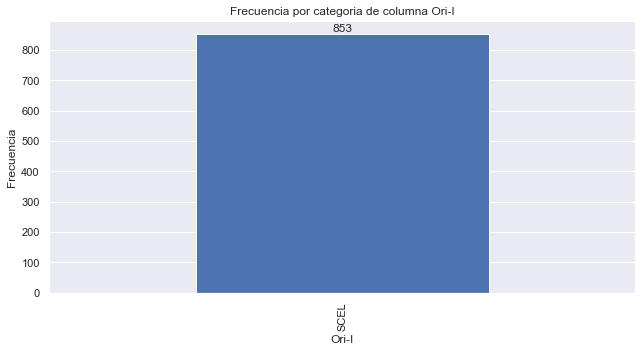

Existen 64 categorías diferentes en [Des-I]: 


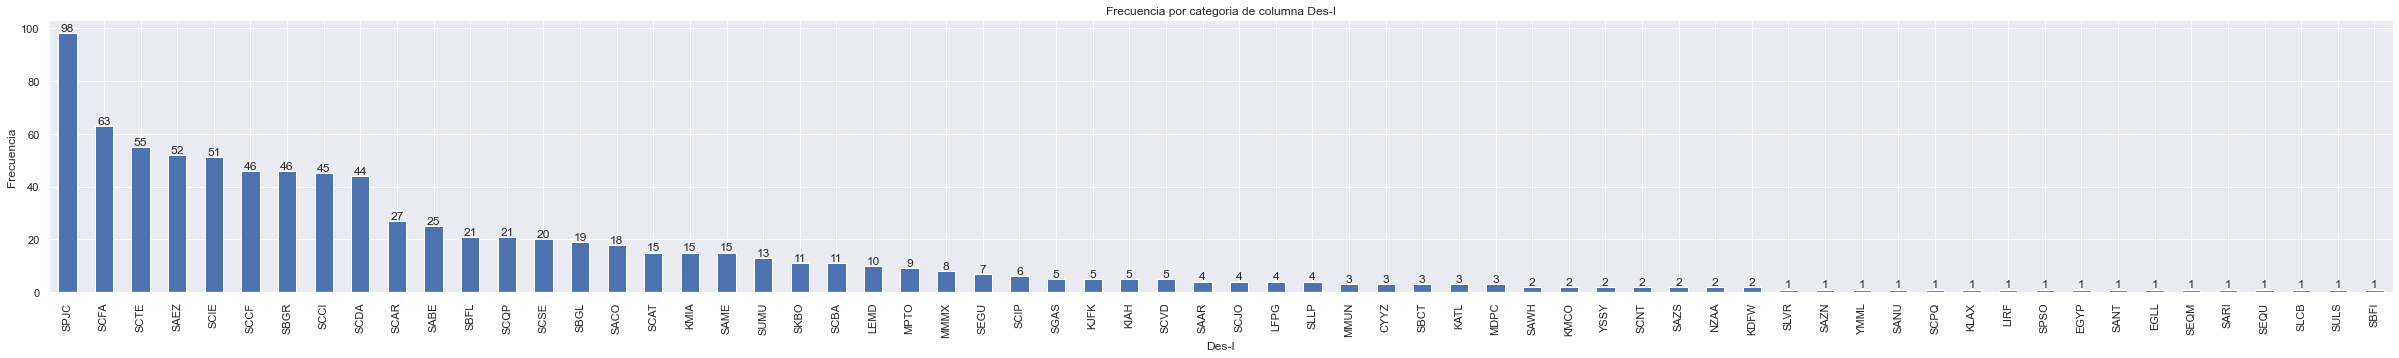

Existen 30 categorías diferentes en [Emp-I]: 


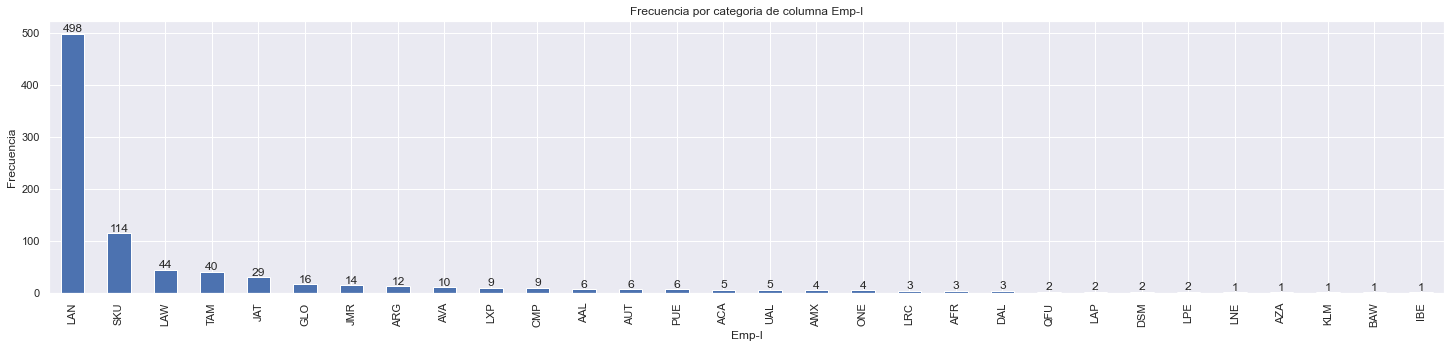

Existen 609 categorías diferentes en [Vlo-O]: 


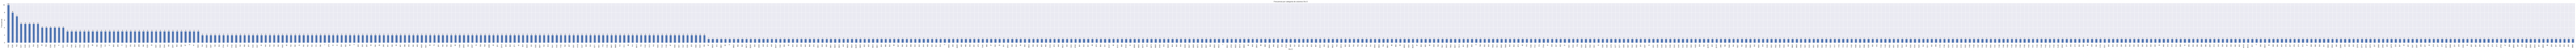

Existen 1 categorías diferentes en [Ori-O]: 


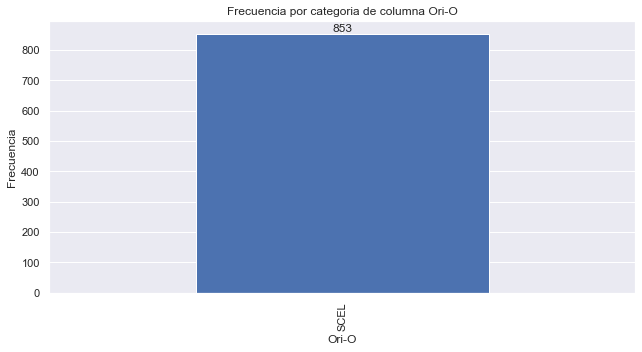

Existen 63 categorías diferentes en [Des-O]: 


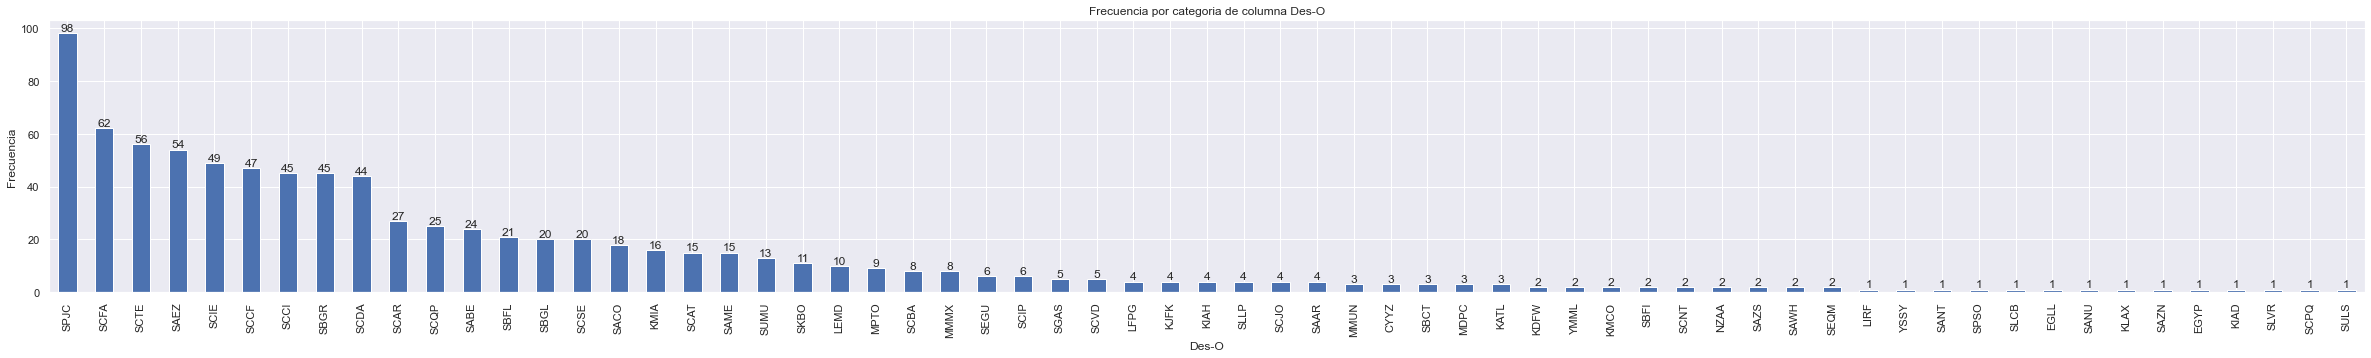

Existen 32 categorías diferentes en [Emp-O]: 


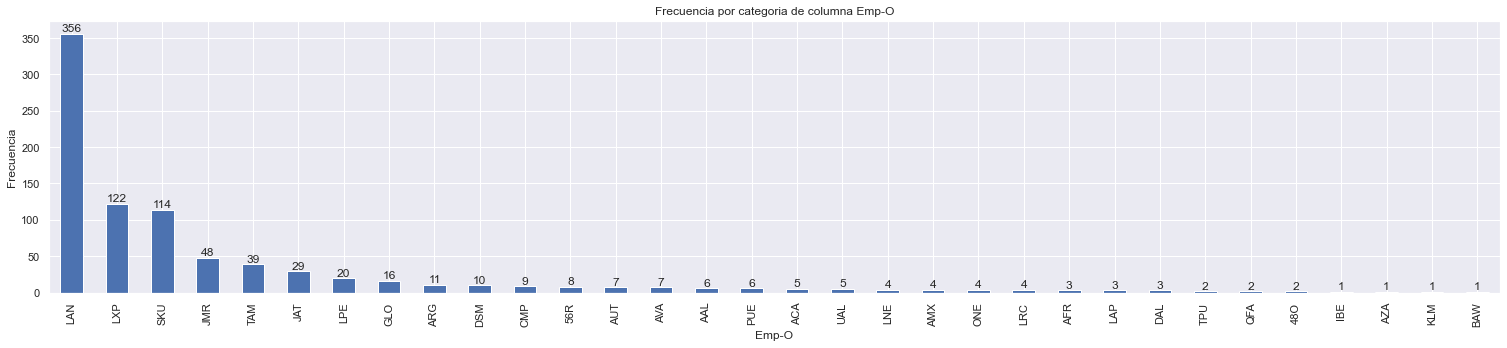

Existen 2 categorías diferentes en [TIPOVUELO]: 


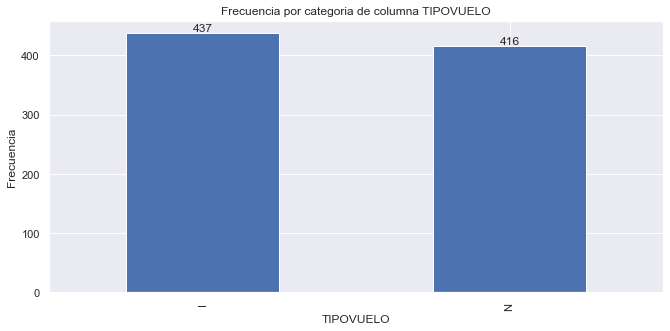

Existen 23 categorías diferentes en [OPERA]: 


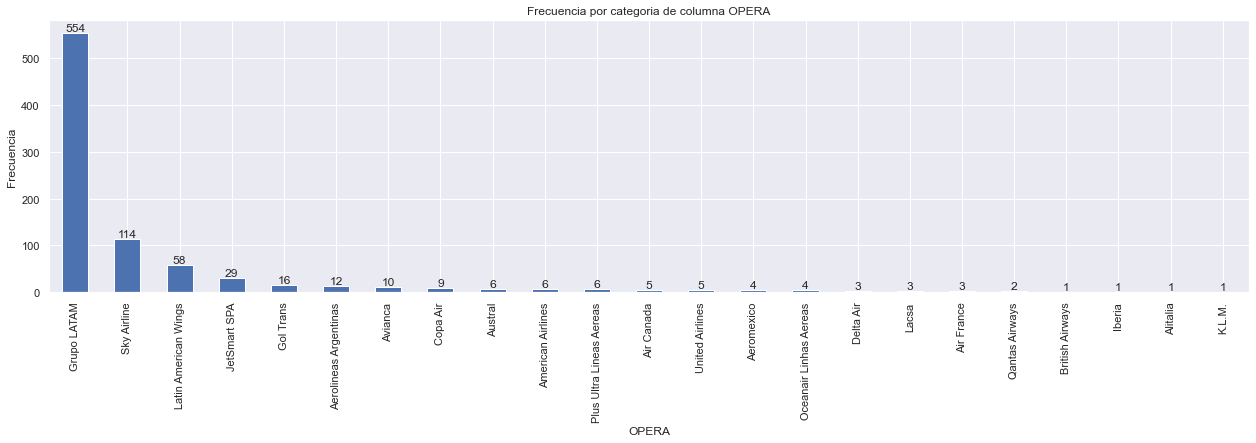

Existen 1 categorías diferentes en [SIGLAORI]: 


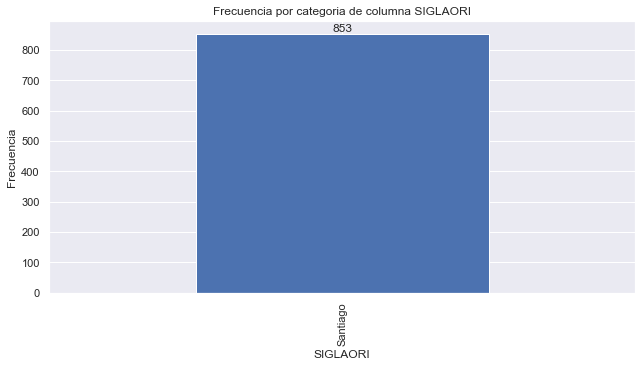

Existen 62 categorías diferentes en [SIGLADES]: 


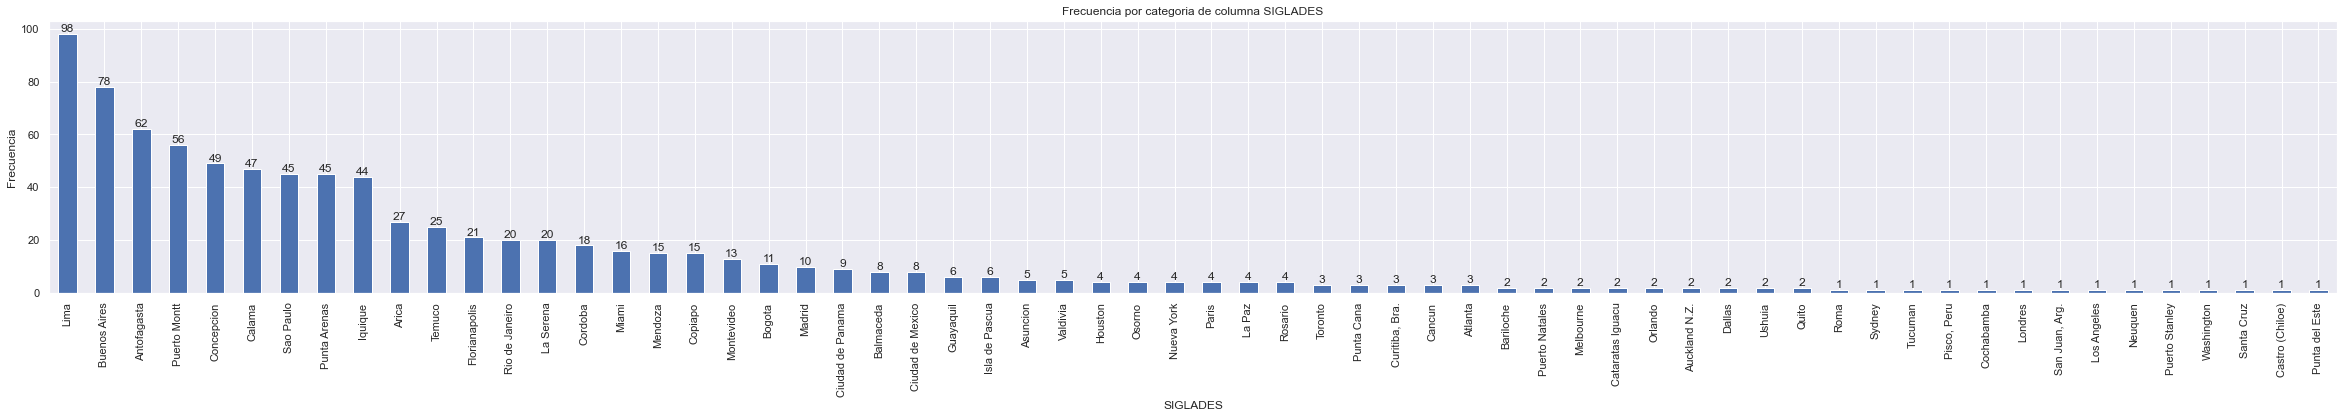

In [30]:
show_bar_plots_from_categories(casos_diferentes.reset_index().convert_dtypes())

De los datos anteriores se observa que el dataset, contiene solo los datos de vuelos salientes desde SCEL hacia otros destinos, por lo que la tarea puede redefinirse como *"predecir la probabilidad de atraso de los vuelos que **despegan** del aeropuerto de Santiago de Chile (SCL)"*

Los datos anteriores nos sirven para entender la variabilidad de las categorías es importante tener presente las frecuencias totales que se pueden mostrar a continuación:

Existen 584 categorías diferentes en [Vlo-I]: 


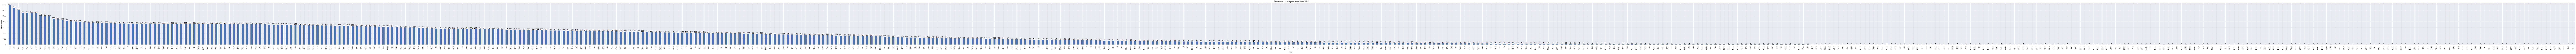

Existen 1 categorías diferentes en [Ori-I]: 


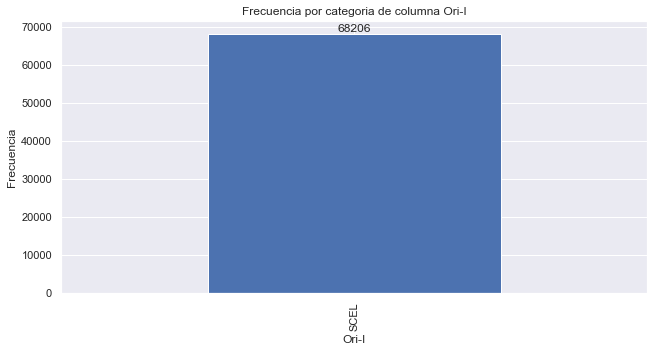

Existen 64 categorías diferentes en [Des-I]: 


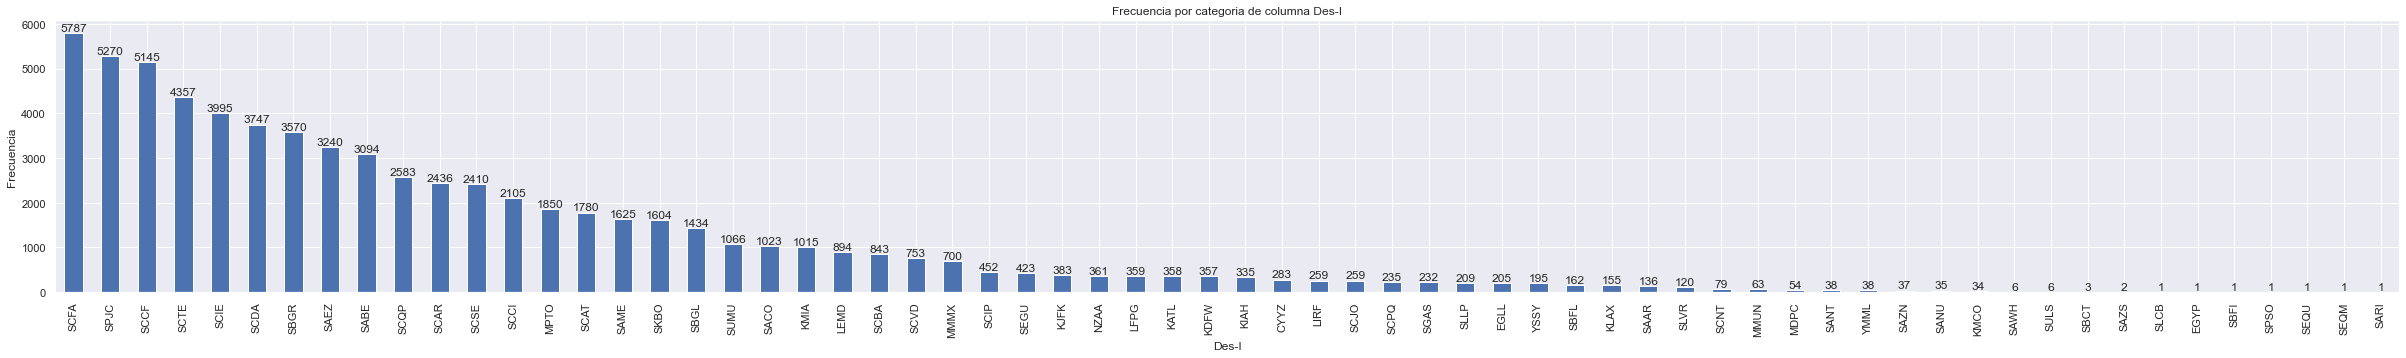

Existen 30 categorías diferentes en [Emp-I]: 


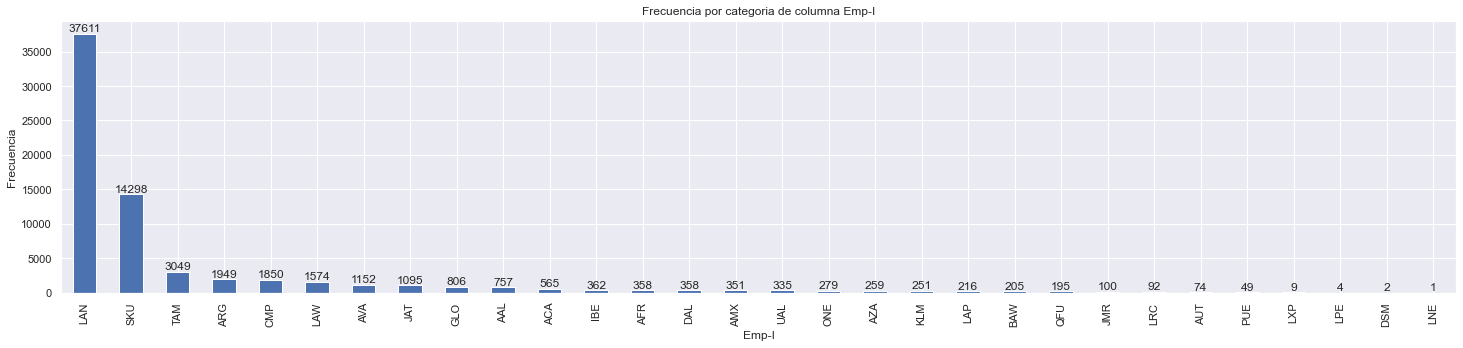

Existen 1 categorías diferentes en [Ori-O]: 


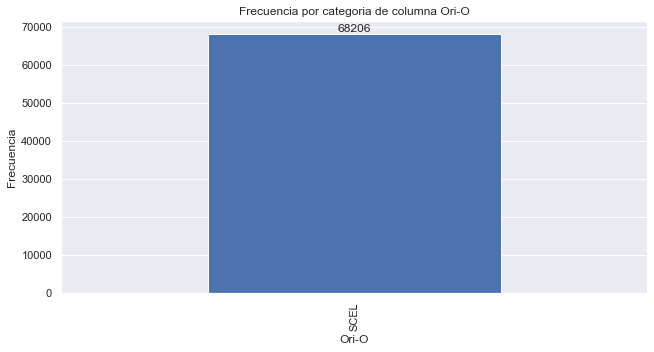

Existen 63 categorías diferentes en [Des-O]: 


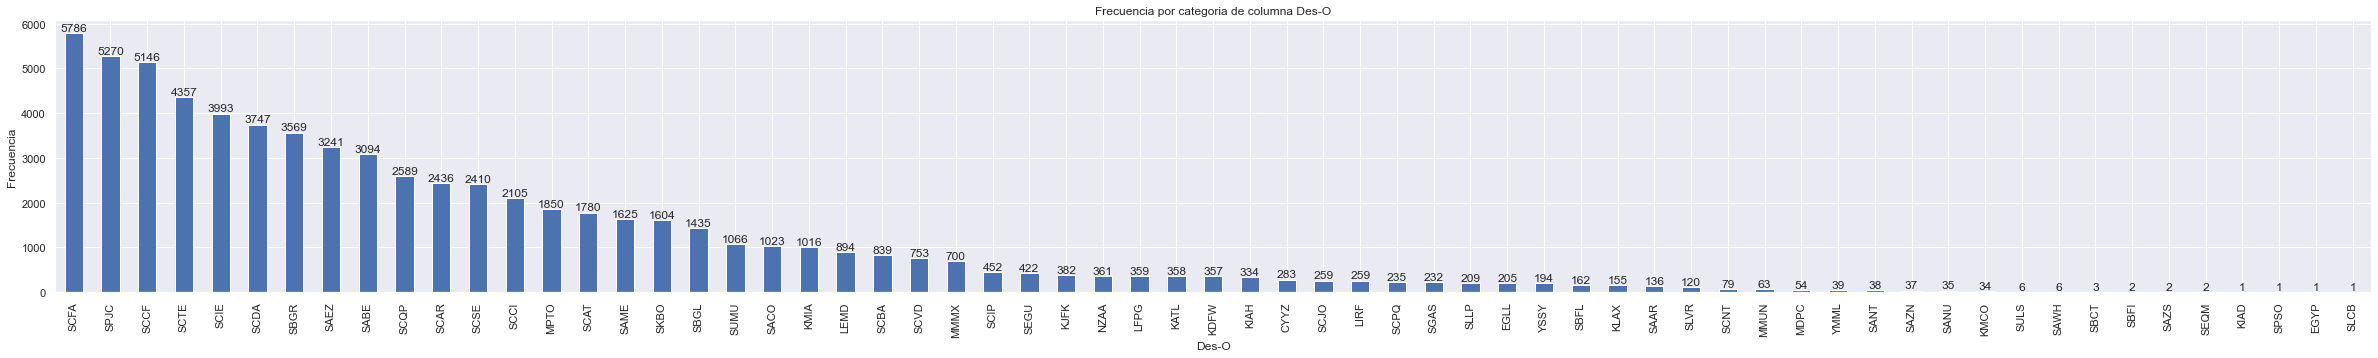

Existen 32 categorías diferentes en [Emp-O]: 


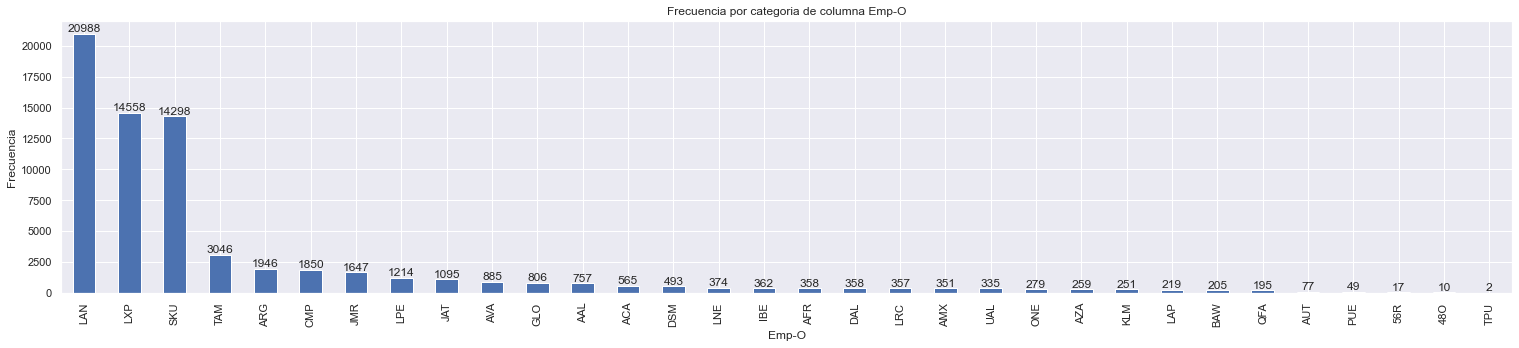

Existen 7 categorías diferentes en [DIANOM]: 


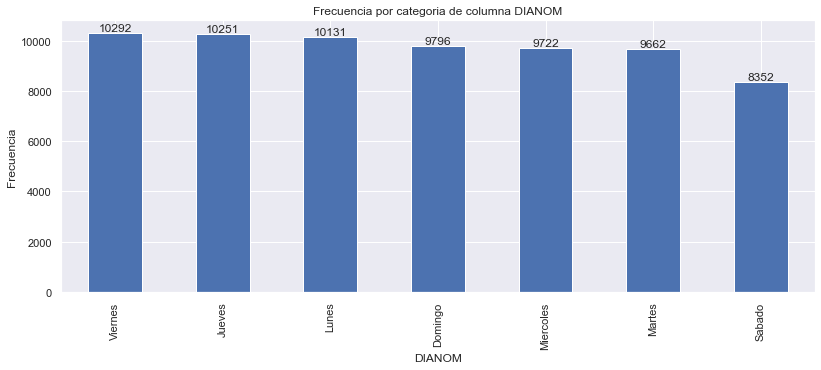

Existen 2 categorías diferentes en [TIPOVUELO]: 


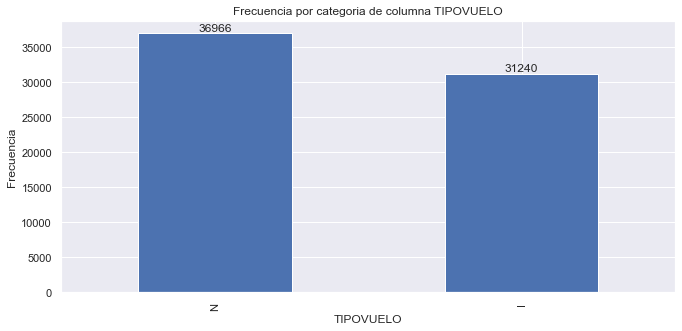

Existen 23 categorías diferentes en [OPERA]: 


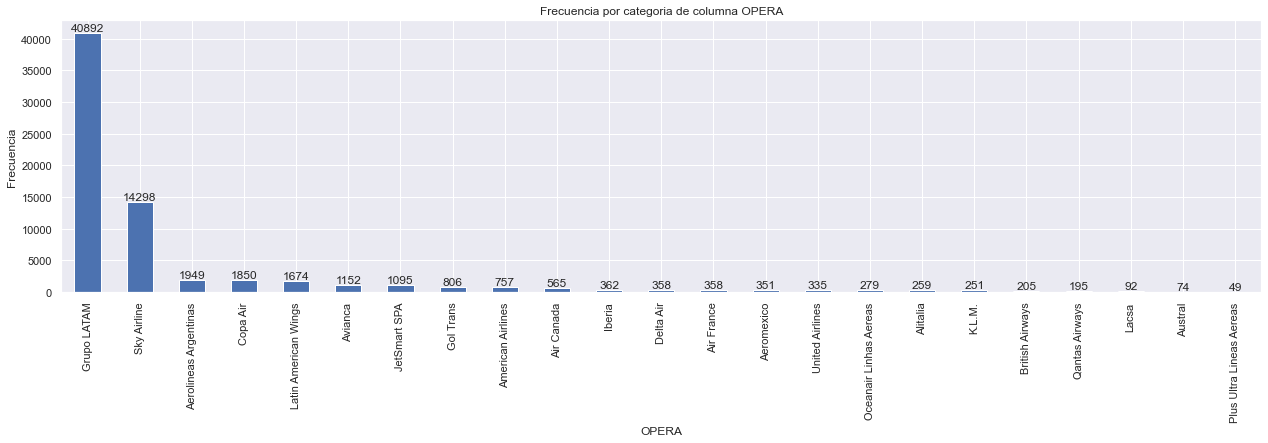

Existen 1 categorías diferentes en [SIGLAORI]: 


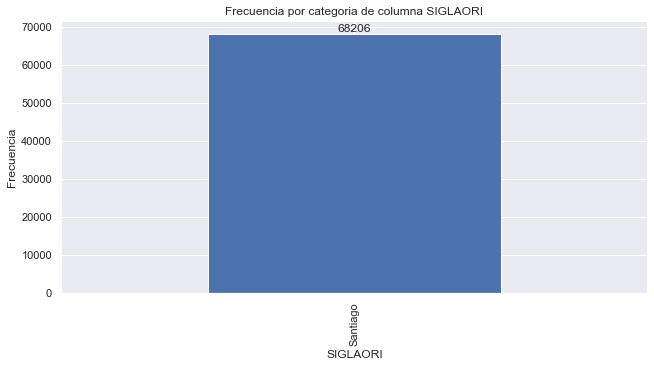

Existen 62 categorías diferentes en [SIGLADES]: 


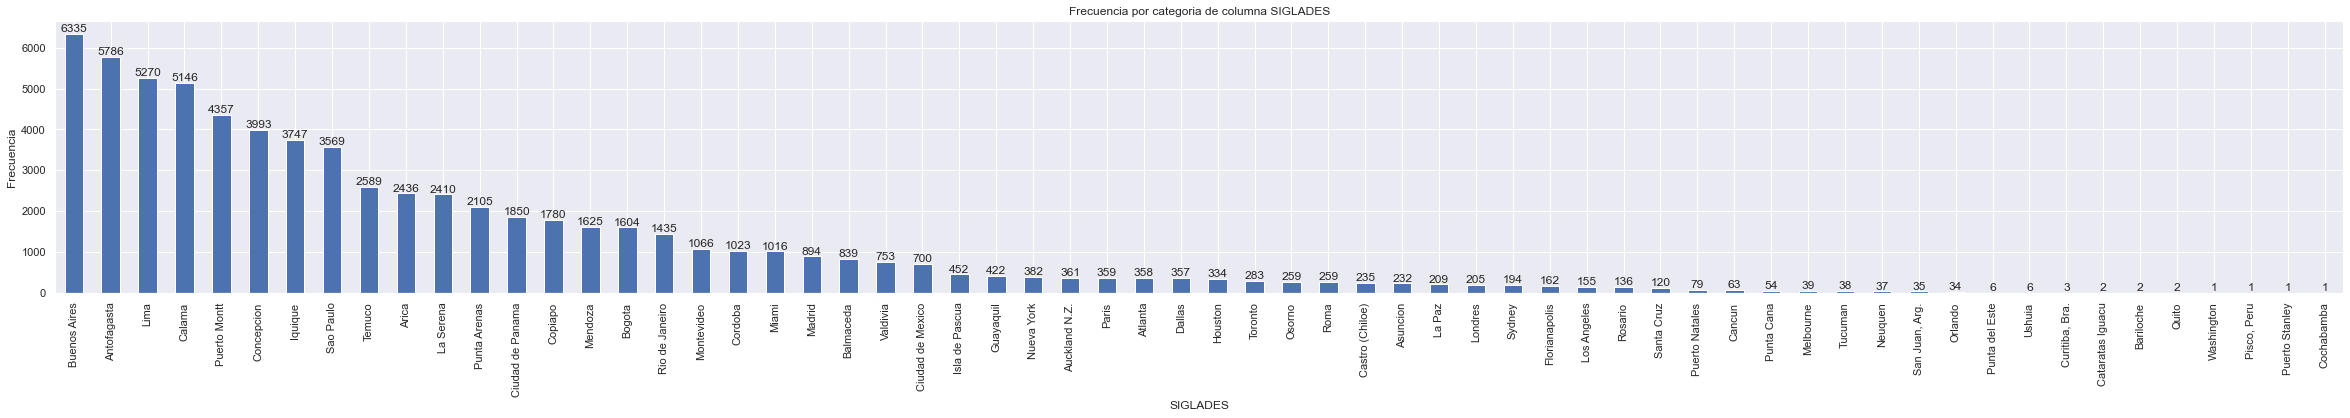

In [31]:
show_bar_plots_from_categories(df)

Mirando el dataset surgen naturalmente algunas preguntas:

¿La empresa que esta programada para hacer un vuelo es siempre la misma que la empresa que opera el vuelo?


In [36]:
df[df["Emp-I"] != df["Emp-O"]][["Emp-I","Emp-O", "TIPOVUELO", "OPERA"]]

,Emp-I,Emp-O,TIPOVUELO,OPERA
345,AUT,ARG,I,Austral
814,AVA,LRC,I,Avianca
815,AVA,LRC,I,Avianca
816,AVA,LRC,I,Avianca
817,AVA,LRC,I,Avianca
...,...,...,...,...
67877,LAW,JMR,N,Latin American Wings
67878,LAW,JMR,N,Latin American Wings
67879,LAW,JMR,N,Latin American Wings
67880,LAW,JMR,N,Latin American Wings


Se observa una inconsistencia en el dataset, **el campo OPERA, en realidad no es la aerolinea que opera sino que la que planifica el vuelo**. Se observan 18669 casos en donde la aerolinea que realmente opera es diferente a la que se indica.



¿El numero de vuelo Programado es el mismo numero de vuelo operado?

In [37]:
df[df["Vlo-I"] != df["Vlo-O"]][["Vlo-I","Vlo-O", "TIPOVUELO", "Des-O", "Des-I", "Emp-I","Emp-O"]]

,Vlo-I,Vlo-O,TIPOVUELO,Des-O,Des-I,Emp-I,Emp-O
6018,4501,1001,I,SAEZ,SAEZ,LAN,LAN
6020,4501,1001,I,SAEZ,SAEZ,LAN,LAN
6022,4501,1003,I,SAEZ,SAEZ,LAN,LAN
6023,4501,1001,I,SAEZ,SAEZ,LAN,LAN
6025,4501,1001,I,SAEZ,SAEZ,LAN,LAN
...,...,...,...,...,...,...,...
60565,530,534,I,SPJC,SPJC,LAN,LAN
61354,7811,1103,I,SAEZ,SAEZ,LAN,LAN
61426,207,207R,N,SCIE,SCIE,LXP,LXP
62175,2287,1287,I,SAEZ,SAEZ,ARG,AUT


Se observan 120 casos en que el numero del vuelo cambió.

¿Que pasa con los destinos programados y operados, deberian ser los mismos ¿son los mismos?

In [40]:
#Que pasa con los detinos programados y operados, deberian ser los mismos ¿son los mismos?
display(df[df["Des-I"] != df["Des-O"]][["Des-I","Des-O", "TIPOVUELO", "SIGLADES","OPERA"]])
print(df[df["Des-I"] != df["Des-O"]][["Des-I","Des-O", "TIPOVUELO", "SIGLADES","OPERA"]].shape)


,Des-I,Des-O,TIPOVUELO,SIGLADES,OPERA
1397,SCTE,SCQP,N,Temuco,Sky Airline
7290,SCTE,SCQP,N,Temuco,Sky Airline
7520,SCIE,SCQP,N,Temuco,Sky Airline
8456,SCTE,SCQP,N,Temuco,Grupo LATAM
12787,SCTE,SCQP,N,Temuco,Sky Airline
12823,SCBA,SCTE,N,Puerto Montt,Sky Airline
16169,KJFK,KMIA,I,Miami,Grupo LATAM
16937,SEGU,SABE,I,Buenos Aires,Grupo LATAM
18293,SCTE,SCQP,N,Temuco,Sky Airline
20444,SCTE,SCCI,N,Punta Arenas,Grupo LATAM


(28, 5)


Interesante!, existen 25 vuelos programados cuyo destino operado cambió. Además se observa que SIGLADES es efectivamente el destino OPERADO y no el programado.


## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
- temporada_alta : 
    - 1 si Fecha-I está entre [15-Dic , 3-Mar], [15-Jul , 31-Jul], [11-Sep, 30-Sep], 
    - 0 si no.


In [41]:
def date_is_between(datetime_test, str_start, str_end): 
    rtn = False
    if datetime_test >= np.datetime64(str_start) and datetime_test <= np.datetime64(str_end):
        rtn = True
    return rtn
            
def date_isin_intervals(datetime_test, interval_list):
    rtn = False
    for interval in interval_list:
        rtn = rtn or date_is_between(datetime_test, interval[0], interval[1])
    return rtn

date_is_between(df.loc[0,'Fecha-I'], '2017-01-01', '2017-12-15') 

date_isin_intervals(df.loc[0,'Fecha-I'], [('2017-01-02', '2017-12-15'), ('2017-01-01', '2017-12-15')])

interval_test = [
                    ('2017-12-15 00:00:00', '2017-12-31 23:59:59'),
                    ('2017-01-01 00:00:00', '2017-03-01 23:59:59'),
                    ('2017-07-15 00:00:00', '2017-07-31 23:59:59'),
                    ('2017-09-11 00:00:00', '2017-09-30 23:59:59')
                ]
date_isin_intervals(np.datetime64('2017-09-10'), interval_test)



False

In [42]:
df['temporada_alta'] = df.apply(lambda x: date_isin_intervals(x[0],interval_test)*1, axis = 1)
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1


Verifiquemos visualmente que esta bien.

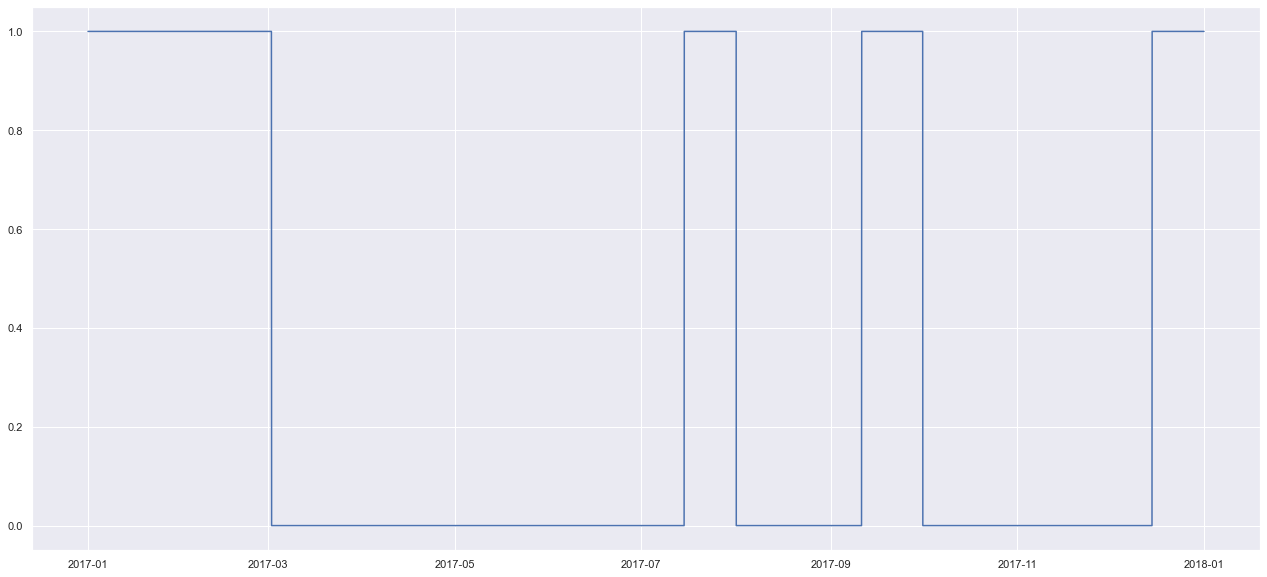

In [43]:
df_temporada = df.sort_values(by='Fecha-I').set_index('Fecha-I')
plt.plot(df_temporada['temporada_alta'])

- dif_min : diferencia en minutos entre Fecha-O y Fecha-I.


In [44]:
def dif_min(dateOperation,datePlanned):
    rtn = None
    if dateOperation >= datePlanned:
        rtn = pd.Timedelta(dateOperation - datePlanned).seconds / 60.0
    else:
        rtn = pd.Timedelta(datePlanned - dateOperation).seconds / -60.0
    return rtn

df['dif_min'] = df[['Fecha-I','Fecha-O']].apply(lambda x: dif_min(x[1], x[0]), axis = 1)
df[['Fecha-I','Fecha-O','dif_min']]

,Fecha-I,Fecha-O,dif_min
0,2017-01-01 23:30:00,2017-01-01 23:33:00,3.0
1,2017-01-02 23:30:00,2017-01-02 23:39:00,9.0
2,2017-01-03 23:30:00,2017-01-03 23:39:00,9.0
3,2017-01-04 23:30:00,2017-01-04 23:33:00,3.0
4,2017-01-05 23:30:00,2017-01-05 23:28:00,-2.0
...,...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00,46.0
68202,2017-12-25 14:55:00,2017-12-25 15:11:00,16.0
68203,2017-12-27 14:55:00,2017-12-27 15:35:00,40.0
68204,2017-12-29 14:55:00,2017-12-29 15:08:00,13.0


- atraso_15 : 
    - 1 si dif_min > 15 
    - 0 si no.


In [45]:
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if (x > 15) else 0)
df.tail(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400,SCEL,SPJC,JAT,...,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1,9.0,0


- periodo_dia (en base a Fecha-I): 
    - mañana (entre 5:00 y 11:59) 
    - tarde (entre 12:00 y 18:59)
    - noche (entre 19:00 y 4:59)

In [46]:
df.loc[0,'Fecha-I'].time().hour
def set_day_period(date):
    rtn = ""
    hora = date.time().hour
    if hora >= 19 or hora < 5:
        rtn = "noche"
    elif hora >= 5 and hora < 12:
        rtn = "mañana"
    elif hora >= 12 and hora < 19:
        rtn = "tarde"
    return rtn

print(df.loc[0,'Fecha-I'], set_day_period(df.loc[0,'Fecha-I']))

2017-01-01 23:30:00 noche


In [47]:
df['periodo_dia'] = df['Fecha-I'].apply(lambda x: set_day_period(x))
df[['Fecha-I','periodo_dia']]

,Fecha-I,periodo_dia
0,2017-01-01 23:30:00,noche
1,2017-01-02 23:30:00,noche
2,2017-01-03 23:30:00,noche
3,2017-01-04 23:30:00,noche
4,2017-01-05 23:30:00,noche
...,...,...
68201,2017-12-22 14:55:00,tarde
68202,2017-12-25 14:55:00,tarde
68203,2017-12-27 14:55:00,tarde
68204,2017-12-29 14:55:00,tarde


In [48]:
df.to_csv('../02_salidas/synthetic_features.csv', encoding='utf-8', index=False)

### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

Probablemente lo que más influye en predecir los atrasos es la aerolinea y el destino. Probablemente mientras más protocolos haya que cumplir, mayor puede ser el tiempo de atraso. Tal vez en momentos de alta demanda, existan menos recursos y por tanto mayor atrasos.  
Análicemos las tasas

In [49]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [50]:
#Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
#Se agregara un nuevo flag si esta atrasado o no.
df["existe_atraso"] = df["dif_min"].apply(lambda x: 1 if x>0 else 0)
#Se agregan flags de atraso cada 10 min hasta 60 min, entendiendo que peuden existir multas  pasada la hora
for i in range(10,70,10):
    df['atraso_'+str(i)] = df["dif_min"].apply(lambda x: 1 if x>=i else 0)


In [51]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'existe_atraso', 'atraso_10', 'atraso_20',
       'atraso_30', 'atraso_40', 'atraso_50', 'atraso_60'],
      dtype='object')

In [55]:
print("Tasas diarias de atraso")
tasas_diarias_dict={}
for col in ["Des-I", "Emp-O", "MES", "DIANOM", "temporada_alta","TIPOVUELO" ]:  
    print(f"Tasas diarias de atraso por [{col}]")
    tasas_diarias= df.groupby([ 
                df["Fecha-I"].dt.month.rename('month'),
                df["Fecha-I"].dt.day.rename('day'),
                col]).sum()[["existe_atraso","atraso_10", "atraso_15", "atraso_20","atraso_30","atraso_40","atraso_50","atraso_60"]]
    tasas_diarias_dict[col] = tasas_diarias
    display(tasas_diarias_dict[col])


Tasas diarias de atraso
Tasas diarias de atraso por [Des-I]


existe_atraso  atraso_10  atraso_15  atraso_20  atraso_30  \
month day Des-I                                                              
1     1   CYYZ               1          1          1          1          0   
          KATL               0          0          0          0          0   
          KDFW               1          0          0          0          0   
          KIAH               1          0          0          0          0   
          KJFK               1          0          0          0          0   
...                        ...        ...        ...        ...        ...   
12    31  SKBO               3          1          1          1          1   
          SPJC              11          6          3          1          1   
          SULS               1          0          0          0          0   
          SUMU               2          0          0          0          0   
          YSSY               0          0          0          0          0   

                 atraso_40  atraso_50  atraso_60  
month day Des-I                                   
1     1   CYYZ           0          0          0  
          KATL           0          0          0  
          KDFW           0          0          0  
          KIAH           0          0          0  
          KJFK           0          0          0  
...                    ...        ...        ...  
12    31  SKBO           1          0          0  
          SPJC           1          1          1  
          SULS           0          0          0  
          SUMU           0          0          0  
          YSSY           0          0          0  

[14614 rows x 8 columns]

Tasas diarias de atraso por [Emp-O]


existe_atraso  atraso_10  atraso_15  atraso_20  atraso_30  \
month day Emp-O                                                              
1     1   48O                1          0          0          0          0   
          AAL                3          1          0          0          0   
          ACA                2          2          2          1          0   
          AFR                0          0          0          0          0   
          AMX                0          0          0          0          0   
...                        ...        ...        ...        ...        ...   
12    31  ONE                2          2          2          2          1   
          QFA                0          0          0          0          0   
          SKU               21         10          5          2          2   
          TAM                4          3          1          0          0   
          UAL                0          0          0          0          0   

                 atraso_40  atraso_50  atraso_60  
month day Emp-O                                   
1     1   48O            0          0          0  
          AAL            0          0          0  
          ACA            0          0          0  
          AFR            0          0          0  
          AMX            0          0          0  
...                    ...        ...        ...  
12    31  ONE            1          0          0  
          QFA            0          0          0  
          SKU            2          2          1  
          TAM            0          0          0  
          UAL            0          0          0  

[8628 rows x 8 columns]

Tasas diarias de atraso por [MES]


existe_atraso  atraso_10  atraso_15  atraso_20  atraso_30  \
month day MES                                                              
1     1   1               85         26         15          8          6   
      2   1              117         37         21         14          9   
      3   1              129         54         30         23          8   
      4   1              144         67         42         33         20   
      5   1              128         56         27         18         14   
...                      ...        ...        ...        ...        ...   
12    28  12             150         80         50         38         18   
      29  12             177        103         66         53         28   
      30  12             106         41         24         19         10   
      31  1                2          1          1          1          1   
          12              90         37         24         16         11   

               atraso_40  atraso_50  atraso_60  
month day MES                                   
1     1   1            2          1          1  
      2   1            7          5          5  
      3   1            6          5          5  
      4   1           10          4          4  
      5   1           10          6          5  
...                  ...        ...        ...  
12    28  12          13          7          5  
      29  12          15          9          8  
      30  12           5          3          2  
      31  1            0          0          0  
          12           9          7          5  

[371 rows x 8 columns]

Tasas diarias de atraso por [DIANOM]


existe_atraso  atraso_10  atraso_15  atraso_20  atraso_30  \
month day DIANOM                                                               
1     1   Domingo             83         24         13          8          6   
          Lunes                2          2          2          0          0   
      2   Lunes              116         36         20         13          8   
          Martes               1          1          1          1          1   
      3   Martes             125         51         27         20          5   
...                          ...        ...        ...        ...        ...   
12    29  Sabado               1          1          1          1          1   
          Viernes            176        102         65         52         27   
      30  Sabado             106         41         24         19         10   
      31  Domingo             90         37         24         16         11   
          Lunes                2          1          1          1          1   

                   atraso_40  atraso_50  atraso_60  
month day DIANOM                                    
1     1   Domingo          2          1          1  
          Lunes            0          0          0  
      2   Lunes            6          4          4  
          Martes           1          1          1  
      3   Martes           4          4          4  
...                      ...        ...        ...  
12    29  Sabado           1          1          1  
          Viernes         14          8          7  
      30  Sabado           5          3          2  
      31  Domingo          9          7          5  
          Lunes            0          0          0  

[550 rows x 8 columns]

Tasas diarias de atraso por [temporada_alta]


existe_atraso  atraso_10  atraso_15  atraso_20  \
month day temporada_alta                                                   
1     1   1                          85         26         15          8   
      2   1                         117         37         21         14   
      3   1                         129         54         30         23   
      4   1                         144         67         42         33   
      5   1                         128         56         27         18   
...                                 ...        ...        ...        ...   
12    27  1                         164         85         47         38   
      28  1                         150         80         50         38   
      29  1                         177        103         66         53   
      30  1                         106         41         24         19   
      31  1                          92         38         25         17   

                          atraso_30  atraso_40  atraso_50  atraso_60  
month day temporada_alta                                              
1     1   1                       6          2          1          1  
      2   1                       9          7          5          5  
      3   1                       8          6          5          5  
      4   1                      20         10          4          4  
      5   1                      14         10          6          5  
...                             ...        ...        ...        ...  
12    27  1                      26         19         13         11  
      28  1                      18         13          7          5  
      29  1                      28         15          9          8  
      30  1                      10          5          3          2  
      31  1                      12          9          7          5  

[365 rows x 8 columns]

Tasas diarias de atraso por [TIPOVUELO]


existe_atraso  atraso_10  atraso_15  atraso_20  \
month day TIPOVUELO                                                   
1     1   I                     53         21         14          7   
          N                     32          5          1          1   
      2   I                     58         22         15          9   
          N                     59         15          6          5   
      3   I                     68         36         25         20   
...                            ...        ...        ...        ...   
12    29  N                    105         55         32         25   
      30  I                     57         23         16         13   
          N                     49         18          8          6   
      31  I                     50         23         16         10   
          N                     42         15          9          7   

                     atraso_30  atraso_40  atraso_50  atraso_60  
month day TIPOVUELO                                              
1     1   I                  6          2          1          1  
          N                  0          0          0          0  
      2   I                  6          6          4          4  
          N                  3          1          1          1  
      3   I                  8          6          5          5  
...                        ...        ...        ...        ...  
12    29  N                 13          8          3          3  
      30  I                  8          5          3          2  
          N                  2          0          0          0  
      31  I                  8          7          5          4  
          N                  4          2          2          1  

[730 rows x 8 columns]

In [44]:
tasas_diarias_dict.keys()

dict_keys(['Des-I', 'Emp-O', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO'])

In [56]:
tasas_promedio_diarias = {}

for col, tasas in tasas_diarias_dict.items():
    #print(f'col[{col}], tasas[{tasas}]') 
    tasas_promedio_diarias[col] = {}
    for category in tasas.reset_index()[col].unique():
        #print("\t"+category)
        tasas_promedio_diarias[col][category] = tasas.loc[:,:,category].mean()
        #print(col+":",category+"\n", tasas.loc[:,:,category].mean()) #('Des-I', axis=0, level=1, drop_level=False)
    

In [57]:
tasas_promedio_diarias["Des-I"].keys()
#get_level_values(0)

dict_keys(['CYYZ', 'KATL', 'KDFW', 'KIAH', 'KJFK', 'KLAX', 'KMIA', 'LEMD', 'LFPG', 'LIRF', 'MDPC', 'MMMX', 'MPTO', 'SABE', 'SACO', 'SAEZ', 'SAME', 'SBFL', 'SBGL', 'SBGR', 'SCAR', 'SCAT', 'SCBA', 'SCCF', 'SCCI', 'SCDA', 'SCFA', 'SCIE', 'SCIP', 'SCJO', 'SCPQ', 'SCQP', 'SCSE', 'SCTE', 'SCVD', 'SEGU', 'SKBO', 'SLLP', 'SPJC', 'SUMU', 'YSSY', 'NZAA', 'SCNT', 'SBFI', 'SGAS', 'EGLL', 'KMCO', 'MMUN', 'SBCT', 'SEQM', 'SLVR', 'SAZS', 'SAAR', 'SANT', 'SANU', 'SAZN', 'YMML', 'SEQU', 'SPSO', 'EGYP', 'SAWH', 'SLCB', 'SULS', 'SARI'])

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [63]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'existe_atraso', 'atraso_10', 'atraso_20',
       'atraso_30', 'atraso_40', 'atraso_50', 'atraso_60'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split
#reducimos el dataset
df_red = df[["Des-I","Emp-O","SIGLADES", "periodo_dia", "temporada_alta", "TIPOVUELO" ,"atraso_15"]]


In [103]:
'''
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_red_1hot = cat_encoder.fit_transform(df_red)

df_red_1hot.get_array()
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\ncat_encoder = OneHotEncoder()\ndf_red_1hot = cat_encoder.fit_transform(df_red)\n\ndf_red_1hot.get_array()\n'

In [95]:
df_red_encode = pd.get_dummies(df_red, drop_first=True)

In [96]:
#realizamos un split stratificado dado que no es un dataset equilibrado
strat_train_set, strat_test_set = train_test_split(
    df_red, test_size=0.2, stratify=df_red_encode["atraso_15"], random_state=42)

In [97]:
#y = strat_train_set["atraso_15"]
#x = strat_train_set.drop(columns=["atraso_15"])

In [102]:
'''
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
 
#Fitting the data to the classifier
model.fit(strat_train_set.drop(columns=["atraso_15"]) ,  strat_train_set["atraso_15"])
 
#Predict on test data
y_predicted = model.predict(strat_test_set.drop(columns=["atraso_15"]))
#strat_train_set.drop(X_train)
'''


C:\Users\maste\anaconda3\envs\LATAM\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [100]:
#strat_train_set.drop("atraso_15")
#df_red.drop(df.columns[-1], axis='columns')